In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [3]:
df = pd.read_csv('../data/covid/processed/overall_data/overall_data.csv')

In [4]:
data_BR = df.query("state == 'TOTAL'")[['epi_week', 'totalCases', 'deaths', 'date']]

In [5]:
# Determine o número de linhas a serem selecionadas (3/4 do total)
num_linhas_selecionadas = int(0.75 * len(data_BR))

# Selecione as primeiras 3/4 partes do DataFrame
subset_data_BR = data_BR.iloc[:num_linhas_selecionadas, :]

subset_data_BR = subset_data_BR[['date', 'deaths']]
subset_data_BR.head

<bound method NDFrame.head of                date  deaths
1        2020-02-25       0
3        2020-02-26       0
5        2020-02-27       0
7        2020-02-28       0
9        2020-02-29       0
...             ...     ...
4241438  2022-06-07  667348
4247035  2022-06-08  667647
4252632  2022-06-09  667790
4258229  2022-06-10  667960
4263826  2022-06-11  668074

[838 rows x 2 columns]>

In [6]:
subset_data_BR.set_index('date', inplace=True)
time_series = subset_data_BR['deaths']
time_series.head

<bound method NDFrame.head of date
2020-02-25         0
2020-02-26         0
2020-02-27         0
2020-02-28         0
2020-02-29         0
               ...  
2022-06-07    667348
2022-06-08    667647
2022-06-09    667790
2022-06-10    667960
2022-06-11    668074
Name: deaths, Length: 838, dtype: int64>

In [7]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid
plt.plot(aleatorio)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [8]:
model = auto_arima(time_series, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=4,
                           start_P=0,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
model.aic()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=12035.053, Time=1.91 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=12965.733, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=12164.375, Time=0.58 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=12046.242, Time=0.44 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,1)(1,1,1)[4]             : AIC=inf, Time=1.43 sec
 ARIMA(1,1,1)(0,1,2)[4]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,1)(1,1,0)[4]             : AIC=inf, Time=0.71 sec
 ARIMA(1,1,1)(1,1,2)[4]             : AIC=inf, Time=1.71 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=inf, Time=0.43 sec
 ARIMA(2,1,1)(0,1,1)[4]             : AIC=11947.121, Time=0.58 sec
 ARIMA(2,1,1)(0,1,0)[4]             : AIC=11948.141, Time=0.31 sec
 ARIMA(2,1,1)(1,1,1)[4]             : AIC=inf, Time=1.25 sec
 ARIMA(2,1,1)(0,1,2)[4]             : AIC=11937.180, Time=0.69 sec
 ARIMA(2,1,1)(1,1,2)[4]             : AIC=11937.237, Time=1.7

11615.697382488404

In [ ]:
import plotly.express as px
df = px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
prediction = pd.DataFrame(model.predict(n_periods=280))

In [ ]:
prediction

,0
2022-06-12,668165.987091
2022-06-13,668229.831515
2022-06-14,668431.884976
2022-06-15,668649.385392
2022-06-16,668840.810299
...,...
2023-03-14,703792.721586
2023-03-15,703959.116579
2023-03-16,704058.373006
2023-03-17,704178.439344


In [10]:
num_linhas_selecionadas = int(0.75 * len(data_BR))

# Selecione o 1/4 restante do DataFrame
restante_df = data_BR.iloc[num_linhas_selecionadas:, :]
restante_df.set_index('date', inplace=True)
time_series_result = restante_df['deaths']

In [ ]:
time_series_result.head


<bound method NDFrame.head of date
2022-06-12    668110
2022-06-13    668180
2022-06-14    668354
2022-06-15    668693
2022-06-16    668844
               ...  
2023-03-14    699310
2023-03-15    699310
2023-03-16    699310
2023-03-17    699310
2023-03-18    699310
Name: deaths, Length: 280, dtype: int64>

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


rmse = np.sqrt(mean_squared_error(time_series_result, prediction))
r2 = r2_score(time_series_result, prediction)
print("RMSE:",rmse)
print("R2:",r2)

RMSE: 2028.822936177613
R2: 0.9333971154210858


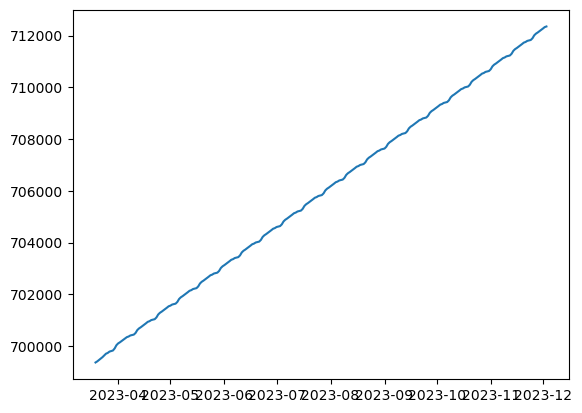

In [105]:
plt.plot(prediction)

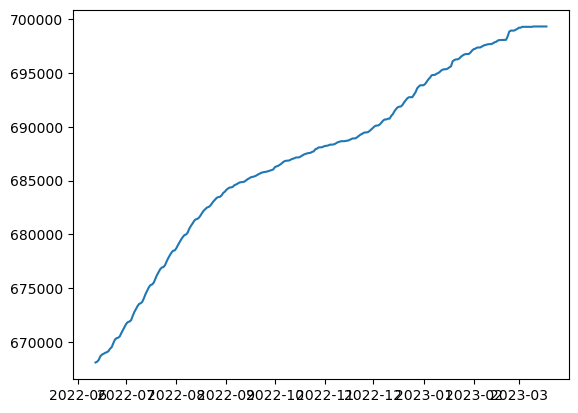

In [106]:
plt.plot(time_series_result)

In [7]:
import pandas as pd
import numpy as np

# Create the dataframe
df = pd.DataFrame({
    'epi_week': np.random.randint(1, 53, 100),
    'deaths': np.random.randint(1, 100, 100),
    'cases': np.random.randint(1, 1000, 100)
})

# Create separate dataframes for 'deaths' and 'cases'
df_deaths = df[['deaths', 'epi_week']].rename(columns={'deaths': 'count'})
df_cases = df[['cases', 'epi_week']].rename(columns={'cases': 'count'})

# Add a 'type' column to each dataframe
df_deaths['type'] = 'deaths'
df_cases['type'] = 'cases'

# Concatenate the two dataframes
df_final = pd.concat([df_deaths, df_cases])

# Print the final dataframe
print(df_final)

    count  epi_week    type
0      70        46  deaths
1      74        42  deaths
2      55         5  deaths
3      78        30  deaths
4      22        28  deaths
..    ...       ...     ...
95    259        52   cases
96    333         7   cases
97    670         3   cases
98    522        29   cases
99    628        29   cases

[200 rows x 3 columns]
